<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png"
     width="200px"
     height="auto"/>
</p>

# <h1 align="center" id="heading">Sentiment Analysis of Twitter Data</h1>

<hr>


### ☑️ Objectives
At the end of this session, you will be able to:
- [ ] Understand how to find and run pre-trained models
- [ ] Evaluate results from pre-trained models
- [ ] Run a pre-trained model using real twitter data


### 🔨 Pre-Assignment

Create a new Conda environment for sentiment anaylsis (sa)

```bash
  conda create -n sa python=3.8 jupyter -y
```

Activate your new environment
```bash
  conda activate sa
```

Open the jupyter-notebook
```bash
  jupyter-notebook
```

Navigate through the repo in the notebook to find `imports.ipynb` for this week and open it.

Run all of the cells in the notebook.


### Background
Please review the weekly narrative [here](https://www.notion.so/Week-2-Data-Centric-AI-the-AI-Product-Lifecycle-72a84c1517b44fcbb3e6bd11d47477dc#2b73937612bb46559f5b91dc2bf55e7d)




<hr>

## 🚀 Let's Get Started

Let's first start with our imports

In [1]:
import csv # Allows us to read and write csv files
from pprint import pprint # Make our print functions easier to read

from transformers import pipeline # Hugging face pipeline to load online models

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

🤗 Transformers provides thousands of pretrained models to perform tasks on different modalities such as text, vision, and audio.

These models can be applied on:
- 📝 Text, for tasks like text classification, information extraction, question answering, summarization, translation, text generation, in over 100 languages.

- 🖼️ Images, for tasks like image classification, object detection, and segmentation.
- 🗣️ Audio, for tasks like speech recognition and audio classification.

This is the pipeline method in transformers that we'll be using to analyze our sentiment data. Since we're not specifying a pretrained model, the pipeline has a default sentiment analysis model called [distilbert-base-uncased-finetuned-sst-2-english](https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).

In [2]:
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In this example, we'll supply two polar sentiments and test out the model pipeline.

In [3]:
data = ["This is great!", "Oh no!"]
sentiment_pipeline(data)

[{'label': 'POSITIVE', 'score': 0.9998694658279419},
 {'label': 'NEGATIVE', 'score': 0.994263231754303}]

The `label` in this case indicates the prediction for the sentiment type.

The `score` indicates the confidence of the prediction (between 0 and 1).

Since our sentiments were very polar, it was easier for the model to predict the sentiment type.

Let's see what happens when we use a less clear example:

In [4]:
challenging_sentiments = ["I don't think freddriq should leave, he's been helpful.",
                          "Is that the lake we went to last month?"]
sentiment_pipeline(challenging_sentiments)

[{'label': 'NEGATIVE', 'score': 0.9955561757087708},
 {'label': 'NEGATIVE', 'score': 0.9860844016075134}]

<hr>

### Loading the Twitter Data

Let's play with some twitter data. We'll be using a modified version of the [Elon Musk twitter dataset on Kaggle](https://www.kaggle.com/datasets/andradaolteanu/all-elon-musks-tweets).

In [5]:
with open('../data/elonmusk_tweets.csv', newline='', encoding='utf8') as f:
    tweets=[]
    reader = csv.reader(f)
    twitter_data = list(reader)
    for tweet in twitter_data:
        tweets.append(tweet[0])

pprint(tweets[:100])

['@vincent13031925 For now. Costs are decreasing rapidly.',
 'Love this beautiful shot',
 '@agnostoxxx @CathieDWood @ARKInvest Trust the shrub',
 'The art In Cyberpunk is incredible',
 '@itsALLrisky 🤣🤣',
 '@seinfeldguru @WholeMarsBlog Nope haha',
 '@WholeMarsBlog If you don’t say anything &amp; engage Autopilot, it will '
 'soon guess based on time of day, taking you home or to work or to what’s on '
 'your calendar',
 '@DeltavPhotos @PortCanaveral That rocket is a hardcore veteran of many '
 'missions',
 'Blimps rock  https://t.co/e8cu5FkNOI',
 '@engineers_feed Due to lower gravity, you can travel from surface of Mars to '
 'surface of Earth fairly easily with a single stage rocket. Earth to Mars is '
 'vastly harder.',
 '@DrPhiltill Good thread',
 '@alexellisuk Pretty much',
 '@tesla_adri @WholeMarsBlog These things are best thought of as '
 'probabilities. There are 5 forward-facing cameras. It is highly likely that '
 'at least one of them will see multiple cars ahead.',
 '@WholeMa

First things first - let's look at the sentiment as determined by the [distilbert-base-uncased-finetuned-sst-2-english](https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english) (default model) in the pipeline.

In [19]:
distil_sentiment = sentiment_pipeline(tweets[0:100])
# distil_sentiment = sentiment_pipeline(sel)

Let's check out the distribution of positive/negative Tweets and see the breakdown using Python's 🐍 standard library `collections.Counter`!

In [20]:
from collections import Counter

tweet_distro = Counter([x['label'] for x in distil_sentiment])
pos_sent_count = tweet_distro['POSITIVE']
neg_sent_count = tweet_distro['NEGATIVE']
total_sent_count = sum(tweet_distro.values())

print(f"{pos_sent_count} ({pos_sent_count / total_sent_count * 100:.2f}%) of the tweets classified are positive.")
print(f"{neg_sent_count} ({neg_sent_count / total_sent_count * 100:.2f}%) of the tweets classified are negative.")

49 (49.00%) of the tweets classified are positive.
51 (51.00%) of the tweets classified are negative.


Let's do that process again, but use a model with an additional potential label "NEUTRAL" called [bertweet-sentiment-analysis](https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis)

To start - we'll build a pipeline with the new model by using the 🤗 Hugging Face address: `finiteautomata/bertweet-base-sentiment-analysis`

In [21]:
bertweet_pipeline = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

Downloading:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

Next, and the same as before, let's run the analysis on 100 of Elon's tweets.

In [22]:
bert_sentiment = bertweet_pipeline(tweets[0:100])

And then, let's check out the breakdown of positive, negative, AND neutral sentiments!

In [23]:
from collections import Counter

tweet_distro = Counter([x['label'] for x in bert_sentiment])
pos_sent_count = tweet_distro['POS']
neu_sent_count = tweet_distro['NEU']
neg_sent_count = tweet_distro['NEG']
total_sent_count = sum(tweet_distro.values())

print(f"{pos_sent_count} ({pos_sent_count / total_sent_count * 100:.2f}%) of the tweets classified are positive.")
print(f"{neu_sent_count} ({neu_sent_count / total_sent_count * 100:.2f}%) of the tweets classified are neutral.")
print(f"{neg_sent_count} ({neg_sent_count / total_sent_count * 100:.2f}%) of the tweets classified are negative.")

29 (29.00%) of the tweets classified are positive.
64 (64.00%) of the tweets classified are neutral.
7 (7.00%) of the tweets classified are negative.


❓ What do you notice about the difference in the results? 

❓ Do the results for the `bertweet-base` model look better, or worse, than the results for the `distilbert-base` model? Why?

<hr>

### Partner Exercise

With your partner, try and determine what the following tweets might be classified as. Try to classify them into the same groups as both of the model pipelines we saw today - and try adding a few of your own sentences/Tweets! 

In [39]:
# example_difficult_tweets = [
#     "Kong vs Godzilla has record for most meth ever consumed in a writer's room",
#     "@ashleevance Battery energy density is the key to electric aircraft. Autonomy for aircraft could have been done a long time ago. Modern airliners are very close to autonomous.",
#     "Tesla's action is not directly reflective of my opinion. Having some Bitcoin, which is simply a less dumb form of liquidity than cash, is adventurous enough for an S&P500 company.",
#     "why in the world there is the evil",
#     "the rainbow is above the sky in ukraine during the war with russia",
# ]

In [40]:
example_difficult_tweets = "Kong vs Godzilla has record for most meth ever consumed in a writer's room"

In [47]:
sentiment_pipeline(example_difficult_tweets)[0]['score']

0.5429086089134216

The `distilbert-base` model:

In [26]:
for tweet in example_difficult_tweets[0:1000]:
    pprint(sentiment_pipeline(tweet))
    print(tweet + '\n')

[{'label': 'POSITIVE', 'score': 0.5429086089134216}]
Kong vs Godzilla has record for most meth ever consumed in a writer's room

[{'label': 'NEGATIVE', 'score': 0.6348389983177185}]
@ashleevance Battery energy density is the key to electric aircraft. Autonomy for aircraft could have been done a long time ago. Modern airliners are very close to autonomous.

[{'label': 'POSITIVE', 'score': 0.9419689178466797}]
Tesla's action is not directly reflective of my opinion. Having some Bitcoin, which is simply a less dumb form of liquidity than cash, is adventurous enough for an S&P500 company.

[{'label': 'NEGATIVE', 'score': 0.9898028373718262}]
why in the world there is the evil

[{'label': 'POSITIVE', 'score': 0.9989979863166809}]
the rainbow is above the sky in ukraine during the war with russia



The `bertweet-base` model:

In [27]:
for tweet in example_difficult_tweets[0:1000]:
    pprint(bertweet_pipeline(tweet))
    print(tweet + '\n')

[{'label': 'NEG', 'score': 0.7213016152381897}]
Kong vs Godzilla has record for most meth ever consumed in a writer's room

[{'label': 'NEU', 'score': 0.8023845553398132}]
@ashleevance Battery energy density is the key to electric aircraft. Autonomy for aircraft could have been done a long time ago. Modern airliners are very close to autonomous.

[{'label': 'NEU', 'score': 0.8843538165092468}]
Tesla's action is not directly reflective of my opinion. Having some Bitcoin, which is simply a less dumb form of liquidity than cash, is adventurous enough for an S&P500 company.

[{'label': 'NEG', 'score': 0.9732426404953003}]
why in the world there is the evil

[{'label': 'NEU', 'score': 0.8584275245666504}]
the rainbow is above the sky in ukraine during the war with russia



❓ How did you do? Did you find any surprising results? 

❓ Are there any instances where the two models gave different predictions for the same tweet?

# Daniele' Assignment

In [70]:
import pandas as pd

Turn tweets into a dataframe

In [76]:
txt = pd.DataFrame(tweets,columns=['tweets'])

Compute the score and label fro both model

In [78]:
txt['dist_label'] = txt['tweets'].apply(lambda x: sentiment_pipeline(x)[0]['label'])
txt['dist_score'] = txt['tweets'].apply(lambda x: sentiment_pipeline(x)[0]['score'])

In [79]:
txt['ber_label'] = txt['tweets'].apply(lambda x: bertweet_pipeline(x)[0]['label'])
txt['ber_score'] = txt['tweets'].apply(lambda x: bertweet_pipeline(x)[0]['score'])

Fast check

In [80]:
txt.head(7)

,tweets,dist_label,dist_score,ber_label,ber_score
0,@vincent13031925 For now. Costs are decreasing...,NEGATIVE,0.996366,NEU,0.952393
1,Love this beautiful shot,POSITIVE,0.999882,POS,0.990994
2,@agnostoxxx @CathieDWood @ARKInvest Trust the ...,NEGATIVE,0.849832,NEU,0.973386
3,The art In Cyberpunk is incredible,POSITIVE,0.999886,POS,0.982427
4,@itsALLrisky 🤣🤣,NEGATIVE,0.983950,NEG,0.962732
5,@seinfeldguru @WholeMarsBlog Nope haha,NEGATIVE,0.993329,NEU,0.865781
6,@WholeMarsBlog If you don’t say anything &amp;...,NEGATIVE,0.991768,NEU,0.926353


Add new features "delta", computed from absolute difference between the two scores

In [134]:
txt['delta'] = abs(txt['ber_score'] - txt['dist_score'])

Export

In [82]:
txt.to_pickle('txt.pkl')

Let's have a look at the distribution of both score

<AxesSubplot:>

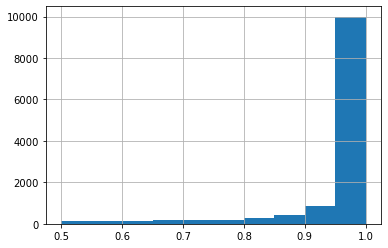

In [83]:
txt['dist_score'].hist()

<AxesSubplot:>

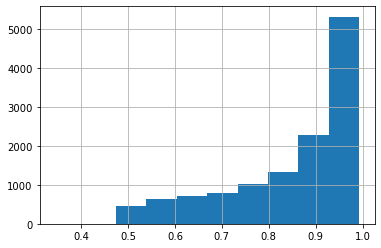

In [84]:
txt['ber_score'].hist()

Let's do some data viz

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_colwidth', None)

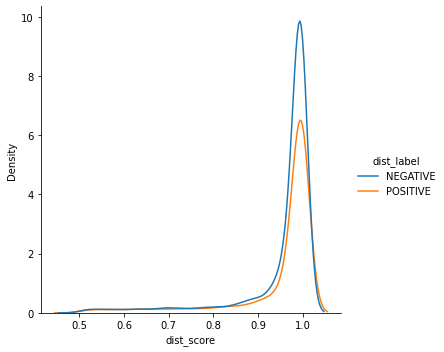

In [101]:
sns.displot(data = txt, x='dist_score',hue='dist_label',kind='kde')

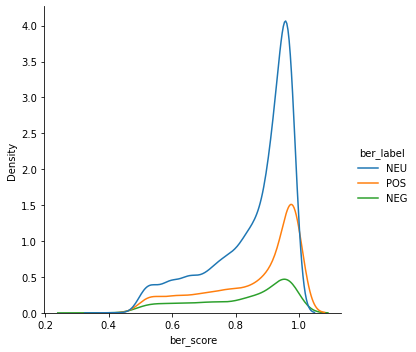

In [102]:
sns.displot(data = txt, x='ber_score',hue='ber_label',kind='kde')

<AxesSubplot:xlabel='ber_label', ylabel='ber_score'>

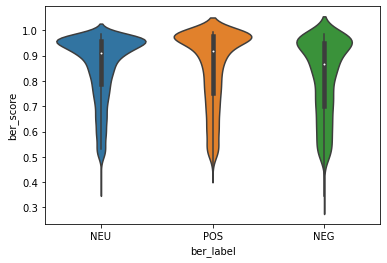

In [106]:
sns.violinplot(data = txt, y='ber_score',x='ber_label',kind='kde')

<AxesSubplot:xlabel='dist_label', ylabel='dist_score'>

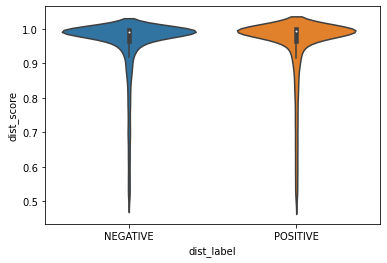

In [107]:
sns.violinplot(data = txt, y='dist_score',x='dist_label',kind='kde')

Let's see how the two models behave: how far are their predictions? Get the frequencies of one model given a given value of another

In [108]:
txt[txt['dist_label']=='NEGATIVE']['ber_label'].value_counts()

NEU    5240
NEG    1327
POS     626
Name: ber_label, dtype: int64

In [109]:
txt[txt['dist_label']=='POSITIVE']['ber_label'].value_counts()

POS    2701
NEU    2547
NEG     121
Name: ber_label, dtype: int64

In [141]:
# sns.displot(data = txt[txt['ber_label']=='NEG'], x='dist_score',hue='dist_label',kind='kde')

Let's see how the models behave in the extreme tails: what are the tweets that one model is almost sure to be positive and another is almosto sure to be negative?

In [128]:
txt[(txt['dist_label']=='NEGATIVE') & (txt['ber_label']=='POS') & (txt['delta']<0.01)]

,tweets,dist_label,dist_score,ber_label,ber_score,delta
132,@summerlinARK We should be laughing our asses off if it’s so damn smart!,NEGATIVE,0.978670,POS,0.987561,0.008891
378,@TechAmazing @UniverCurious Tunnels!!,NEGATIVE,0.991728,POS,0.990944,0.000785
1218,"@Nigel_Lockyer I could not be more excited about the new supercollider! That said, while it is considerably larger, I don’t think it necessarily requires all that much incremental engineering.",NEGATIVE,0.974094,POS,0.983020,0.008926
1916,@flcnhvy It will blow ur mind haha https://t.co/LqnKEN5Kjn,NEGATIVE,0.978930,POS,0.972867,0.006063
2256,@EfficiencyLast @jaminwestby @teslaownersSV @jgrano305 @TeslaratiTeam @Teslarati Should do this automatically,NEGATIVE,0.592546,POS,0.597797,0.005250
3977,Chairs are underappreciated,NEGATIVE,0.981183,POS,0.983448,0.002265
4162,Almost three now. Boca team is crushing it! Starship has giant dome 🤣🤣 https://t.co/qTN2TU02pb,NEGATIVE,0.991221,POS,0.986549,0.004672
5541,"@austinbarnard45 Exciting progress in Boca! Hopper almost ready to hover. Based on tonight’s test, looks like 600 Hz Raptor vibration problem is fixed. https://t.co/9bLWOHG0sV",NEGATIVE,0.954492,POS,0.961964,0.007472
5554,Reason for top rating is that active steering &amp; braking safety features of Tesla Autopilot are turned on no cost for all cars https://t.co/HBKwAEbgc9,NEGATIVE,0.920904,POS,0.929154,0.008250
6145,@martinengwicht @msitver @FrankLuntz Anti-matter def wins on energy density 🤣🤣,NEGATIVE,0.876640,POS,0.877243,0.000603


In [130]:
txt[(txt['dist_label']=='POSITIVE') & (txt['ber_label']=='NEG') & (txt['delta']<0.05)]

,tweets,dist_label,dist_score,ber_label,ber_score,delta
462,"@RationalEtienne @Adamklotz_ Starlink is a staggeringly difficult technical &amp; economic endeavor. However, if we don’t fail, the cost to end users will improve every year.",POSITIVE,0.532565,NEG,0.487776,0.044789
1264,"Wow, this mayo sure is salty!",POSITIVE,0.975310,NEG,0.955648,0.019662
2072,@schristakos @BernieSanders And to think I used to like Bernie! 😢 https://t.co/adojS2UCe3,POSITIVE,0.661259,NEG,0.612111,0.049148
2969,"@flcnhvy @thirdrowtesla @YoavOffek Roundabouts no problem, but dodging distracted human drivers very tricky!",POSITIVE,0.876912,NEG,0.906452,0.029540
3011,@AlexBerenson @neil_ferguson What a tool,POSITIVE,0.989700,NEG,0.971400,0.018300
3357,"@thirdrowtesla Yes, this is a real problem. The science is not in doubt.",POSITIVE,0.989855,NEG,0.955395,0.034459
3370,@Jamie_Woodward_ … is bs,POSITIVE,0.965898,NEG,0.949578,0.016320
3382,@Afan_Mujawar .@GreatDismal,POSITIVE,0.937056,NEG,0.955660,0.018604
3645,Wacktivism!,POSITIVE,0.992553,NEG,0.965154,0.027398
3700,"@Sofiaan @Tesla True. Oddly, those who complained didn’t actually order FSD. Perhaps they weren’t aware that the computer is upgraded for free if the FSD option is ordered even after delivery.",POSITIVE,0.557036,NEG,0.511047,0.045990


## Conclusion

- I've decided to compute the analysis on all tweets available, for both models.
- I've choose to investigate the behavior on the extreme tail of the results (opposite results). These are some summary findings:
    - distilbert returns more skewed results (power law)
    - bertweet returns less skewd results, offering some kind of uncertainty on the results, given also the fact that there is a new "neutral" label
    - These neutral results seems more related to the negative class predicted by distilbert model --> should be more investigated
    - on the "extreme" value:
        - distilberts seems to not deal with emojis respect to bertweet
        - it's seems there is some kind of difficulty to predict the label of the "tesla/spacex" related tweets
        - distilberts seems work more by looking at the meaning of a single "keywords", without looking at the sentence overall

Something more can be done: clustering of the tweets? communities detection?, etc...